# **Utilização da base clusterizada**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
import numpy as np
from sklearn.svm import OneClassSVM
import scipy


In [2]:
def features_por_posicao(posicao):
    if posicao == 'FW':
        return fw_features1
    elif posicao == 'MF':
        return mf_features1
    elif posicao == 'DF':
        return df_features1
    elif posicao == 'DFMF':
        return dfmf_features1
    elif posicao == 'MFDF':
        return mfdf_features1
    elif posicao == 'DFFW':
        return dffw_features1
    elif posicao == 'FWMF':
        return fwmf_features1
    elif posicao == 'FWDF':
        return fwdf_features1
    elif posicao == 'GK':
        return gk_features1
    elif posicao== 'MFFW':
      return mffw_features1
    else:
        return None


In [3]:
# Features para filtro
fw_features1 = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp"]
mf_features1 = ["Goals","PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist" , "Fld"]
df_features1 = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr","Carries"
                     ,"TouDefPen","TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen","Assists"]
dfmf_features1 = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR", "Fls", "Clr", "TouDefPen", "TouDef3rd", "TouMid3rd", "TouAtt3rd", "TouAttPen", "GCA", "GcaPassLive", "GcaPassDead", "GcaDrib"]
mfdf_features1 = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", "PasOff", "PasBlocks", "ScaPassLive", "ScaPassDead", "ScaSh", "ScaFld", "GcaPassLive", "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl"]
dffw_features1 = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR", "Fls", "Clr", "TouDefPen", "TouDef3rd", "TouMid3rd", "TouAtt3rd", "TouAttPen", "Assists", "Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "PasAss", "Pas3rd"]
fwmf_features1 = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "Off", "PKwon", "Assists",
                  "Car3rd", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis", "PasTotCmp","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%"]
fwdf_features1=["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "Assists", "ScaPassLive", "Car3rd",
                "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis", "PasTotCmp", "PasAss", "Pas3rd",
                "Crs", "PasCmp", "PasOff", "PasBlocks", "ScaPassDead", "ScaDrib", "ScaSh", "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl",
                "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%"]
gk_features1 = ["PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int"]
mffw_features1= ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                 "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "ScaPassLive", "ScaPassDead", "ScaSh", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%"]

# Utilização do dataframe com os clusters já adicionados.

In [4]:
import pandas as pd
import chardet

# Detect the encoding of the CSV file
with open('/content/dfFootaballClusters (2).csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

print(f"Detected encoding: {encoding}")
# Read the CSV file with the detected encoding
df = pd.read_csv('/content/dfFootaballClusters (2).csv', sep=';', encoding=encoding)



Detected encoding: Windows-1252


In [5]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Cluster
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,7
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,3
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,9
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0,4
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4,0


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df[df['Pos']=='FW']['Goals']

12      6
14      0
16      4
22      1
37      0
       ..
2969    1
2981    0
2988    1
2991    3
3005    1
Name: Goals, Length: 465, dtype: int64

<Axes: ylabel='Carries'>

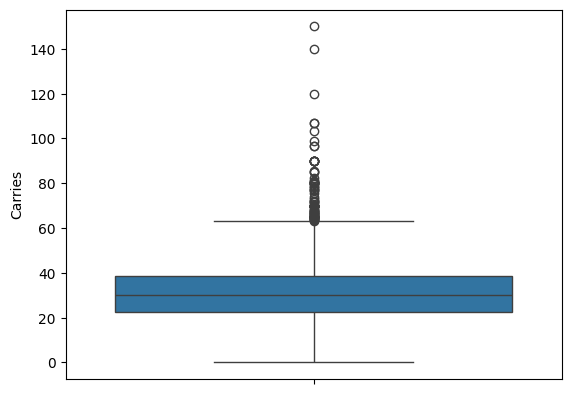

In [8]:
sns.boxplot(df['Carries'])

In [9]:
df[df['Player']=='Rodri']['PasBlocks']

2320    0.47
Name: PasBlocks, dtype: float64

<Axes: ylabel='PasBlocks'>

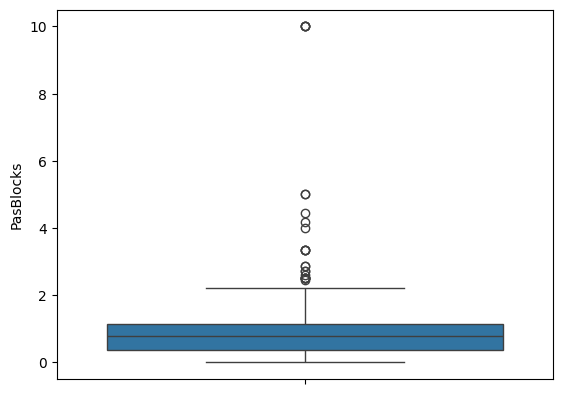

In [10]:
sns.boxplot(df[df['Pos']=='MF']['PasBlocks'])

# Funções para vizualização de dados e sistema de recomendação/ busca por similaridade

In [11]:
#Cálculo das carcterísticas mais destacadas de determinado jogador com algoritimos de ML -TENTATIVA
#Busca de números anomalos
def anomalias_isolation_forest_p(jogador, df, features):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    jogador_scaled = scaler.transform(jogador[features])

    modelo = IsolationForest()
    modelo.fit(df_scaled)
    anomalias = modelo.decision_function(jogador_scaled)
    return anomalias

def anomalias_mcd_p(jogador, df, features):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    jogador_scaled = scaler.transform(jogador[features])

    modelo = EllipticEnvelope()
    modelo.fit(df_scaled)
    anomalias = modelo.decision_function(jogador_scaled)
    return anomalias

def anomalias_one_class_svm_p(jogador, df, features):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    jogador_scaled = scaler.transform(jogador[features])

    modelo = OneClassSVM()
    modelo.fit(df_scaled)
    anomalias = modelo.decision_function(jogador_scaled)
    return anomalias

def pontos_anomalos_jogadorN_p(nome_jogador, df):
    jogadores_filtrados, features, dados_jogador = filtragem_pos_clus(nome_jogador, df)
    media_dados = df[features].mean()

    resultados = {}

    anomalias_if = anomalias_isolation_forest_p(jogadores_filtrados, df, features)
    anomalias_mcd_res = anomalias_mcd_p(jogadores_filtrados, df, features)
    anomalias_svm = anomalias_one_class_svm_p(jogadores_filtrados, df, features)

    indices_ordenados_if = np.argsort(anomalias_if)
    indices_ordenados_mcd = np.argsort(anomalias_mcd_res)
    indices_ordenados_svm = np.argsort(anomalias_svm)

    top6_indices_if = indices_ordenados_if[:6]
    top6_indices_mcd = indices_ordenados_mcd[:6]
    top6_indices_svm = indices_ordenados_svm[:6]

    above_average_features_if = [features[i] for i in top6_indices_if if i < len(features) and anomalias_if[i] < media_dados[i]]
    below_average_features_if = [features[i] for i in top6_indices_if if i < len(features) and anomalias_if[i] >= media_dados[i]]

    above_average_features_mcd = [features[i] for i in top6_indices_mcd if i < len(features) and anomalias_mcd_res[i] < media_dados[i]]
    below_average_features_mcd = [features[i] for i in top6_indices_mcd if i < len(features) and anomalias_mcd_res[i] >= media_dados[i]]

    above_average_features_svm = [features[i] for i in top6_indices_svm if i < len(features) and anomalias_svm[i] < media_dados[i]]
    below_average_features_svm = [features[i] for i in top6_indices_svm if i < len(features) and anomalias_svm[i] >= media_dados[i]]

    resultados['Isolation Forest'] = (below_average_features_if, above_average_features_if)
    resultados['Minimum Covariance Determinant (MCD)'] = (below_average_features_mcd, above_average_features_mcd)
    resultados['One-Class SVM'] = (below_average_features_svm, above_average_features_svm)

    return resultados

#Retorna todo o um cluster específico de uma posição a partir de um jogador específico
def filtragem_pos_clus(nome_jogador, df):
    dados_jogador = df[df['Player'] == nome_jogador]

    posicao_jogador = dados_jogador['Pos'].iloc[0]
    cluster_jogador = dados_jogador['Cluster'].iloc[0]

    jogadores_filtrados = df[(df['Pos'] == posicao_jogador) & (df['Cluster'] == cluster_jogador)]
    features = features_por_posicao(posicao_jogador)

    return jogadores_filtrados, features,dados_jogador



#Cálculo dos jogadores mais próximos de um ponto, de acordo com posição de cluster, usando Nearest Neighbors
def calculo_jogadores_recomendados(nome_jogador, df, metric):
    jogadores_filtrados, features, dados_jogador = filtragem_pos_clus(nome_jogador, df)


    scaler = StandardScaler()
    dados_padronizados = scaler.fit_transform(jogadores_filtrados[features])

    nbrs = NearestNeighbors(n_neighbors=10, algorithm="auto", metric=metric)
    nbrs.fit(dados_padronizados)

    dados_jogador_padronizados = scaler.transform(dados_jogador[features])

    distancias, indices = nbrs.kneighbors(dados_jogador_padronizados)

    indices_jogadores_recomendados = indices[0]
    jogadores_recomendados = jogadores_filtrados.iloc[indices_jogadores_recomendados]

    return jogadores_recomendados

#Cálculo das carcterísticas mais destacadas de determinado jogador
def calculo_player_top_features(nome_jogador, df):
    jogadores_filtrados, features, dados_jogador = filtragem_pos_clus(nome_jogador, df)

    scaler = StandardScaler()
    jogadores_filtrados.loc[:, features] = scaler.fit_transform(jogadores_filtrados[features])

    jogador_padronizado = jogadores_filtrados[jogadores_filtrados['Player'] == nome_jogador].iloc[0]

    indices_ordem_crescente = np.argsort(jogador_padronizado[features])

    maiores_caracteristicas = [(features[i], jogador_padronizado[features[i]]) for i in indices_ordem_crescente[-3:]]

    menores_caracteristicas = [(features[i], jogador_padronizado[features[i]]) for i in indices_ordem_crescente[:3]]

    return maiores_caracteristicas, menores_caracteristicas

#Retorno para vizualição das top features
def player_top_features(nome_jogador,df):

  jogadores_filtrados, features, dados_jogador = filtragem_pos_clus(nome_jogador, df)

  top_features,shit_features=calculo_player_top_features(nome_jogador,df)

  tpf = []
  for i,x in top_features:
    tpf.append(i)
  for i,x in shit_features:
    tpf.append(i)

  jogador = jogadores_filtrados[jogadores_filtrados['Player'] == nome_jogador].iloc[0]
  jogador_f = jogador[tpf]
  #As trÊs primeiras são as "melhores" e as três últimas as "piores"
  return jogador_f

import scipy.spatial.distance
#Função para busca dos sete jogadores mais próximos dentro da posição e do cluster, usando apenas as features da posição
def jogadoresRecomendados(nome_jogador, df):
    posicao_jogador = df.loc[df['Player'] == nome_jogador, 'Pos'].iloc[0]
    features = features_por_posicao(posicao_jogador)
    jogadores_posicao = df[df['Pos'] == posicao_jogador]
    cluster_jogador = df.loc[df['Player'] == nome_jogador, 'Cluster'].iloc[0]
    jogadores_cluster = jogadores_posicao[jogadores_posicao['Cluster'] == cluster_jogador]
    dados_jogador = df[df['Player'] == nome_jogador]
    distancias = scipy.spatial.distance.cdist(dados_jogador[features], jogadores_cluster[features], metric='euclidean')
    distancias_df = pd.DataFrame({'Player': jogadores_cluster['Player'], 'Distancia': distancias.flatten()})
    jogadores_finais = distancias_df.sort_values(by='Distancia').head(7)

    return jogadores_finais

#Função para busca dos sete jogadores mais próximos dentro da posição e do cluster, usando todas as features
def jogadores_recomendados(nome_jogador, df):

    posicao_jogador = df.loc[df['Player'] == nome_jogador, 'Pos'].iloc[0]
    jogadores_posicao = df[df['Pos'] == posicao_jogador]
    cluster_jogador = df.loc[df['Player'] == nome_jogador, 'Cluster'].iloc[0]
    jogadores_cluster = jogadores_posicao[jogadores_posicao['Cluster'] == cluster_jogador]
    dados_jogador = df[df['Player'] == nome_jogador].drop(['Player', 'Cluster', 'Pos', 'Comp', 'Squad', 'Nation'], axis=1)
    distancias = scipy.spatial.distance.cdist(dados_jogador, jogadores_cluster.drop(['Player', 'Cluster', 'Pos', 'Comp', 'Squad', 'Nation'], axis=1), metric='euclidean')
    distancias_df = pd.DataFrame({'Player': jogadores_cluster['Player'], 'Distancia': distancias.flatten()})
    jogadores_finais = distancias_df.sort_values(by='Distancia').head(7)

    return jogadores_finais


Vizulização das funções de busca de número anômalos

In [12]:
resultados = pontos_anomalos_jogadorN_p('Lionel Messi', df)

for nome_modelo, (above_average_features, below_average_features) in resultados.items():
    print(f"Resultados para o modelo {nome_modelo}:")
    print("Características acima da média de anomalia:")
    print(above_average_features)
    print("Características abaixo da média de anomalia:")
    print(below_average_features)
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-206.470568426405208 > -209.262916539766877). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-206.404363311222625 > -207.924011231224796). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(d

Resultados para o modelo Isolation Forest:
Características acima da média de anomalia:
[]
Características abaixo da média de anomalia:
['ShoDist', 'ScaFld', 'ToSuc', 'CarTotDist', 'Goals', 'G/SoT']


Resultados para o modelo Minimum Covariance Determinant (MCD):
Características acima da média de anomalia:
['CarPrgDist', 'ShoDist', 'CPA', 'G/Sh']
Características abaixo da média de anomalia:
['Goals', 'ScaFld']


Resultados para o modelo One-Class SVM:
Características acima da média de anomalia:
[]
Características abaixo da média de anomalia:
['ScaFld', 'ShoDist', 'Goals', 'CarTotDist', 'ToSuc', 'Assists']




In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2917 entries, 0 to 3006
Columns: 124 entries, Player to Cluster
dtypes: float64(112), int64(7), object(5)
memory usage: 2.8+ MB


In [14]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Cluster
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,7
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,3
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,9
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0,4
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4,0


In [15]:
print(df[df['Player']=='Rémy Cabella'])

           Player Nation   Pos  Squad     Comp  Age  Born  MP  Starts   Min  \
415  Rémy Cabella    FRA  MFFW  Lille  Ligue 1   32  1990  16      13  1197   

     ...   Crs  TklW  PKwon  PKcon   OG  Recov  AerWon  AerLost  AerWon%  \
415  ...  5.04  1.65    0.0    0.0  0.0   5.86    0.15     0.83     15.4   

     Cluster  
415        8  

[1 rows x 124 columns]


Comparação dos resultados obtidos da utilização de diferentes métricas para Nearest Neighbors.

In [16]:
#Teste da função com diferentes métricas de cálculo de distância
DISTANCE_METRICS={"cosine","euclidean","chebyshev","minkowski","manhattan","hamming","jaccard"}


for metrica in DISTANCE_METRICS:
  jogadores_recomendados=calculo_jogadores_recomendados('Toni Kroos', df ,metrica)
  print(f"\nJogadores Recomendados usando {metrica}:")
  print(jogadores_recomendados["Player"])




Jogadores Recomendados usando chebyshev:
1477             Toni Kroos
312     Jean-Claude Billong
2104        Leandro Paredes
333        Antonin Bobichon
2110          Marco Pašali?
1147          Ander Guevara
2102        Leandro Paredes
2113         Javier Pastore
516           Dani Ceballos
708             Diego Demme
Name: Player, dtype: object

Jogadores Recomendados usando jaccard:
2175        Kalvin Phillips
2113         Javier Pastore
2826         Marco Verratti
2724       Corentin Tolisso
2513          Jonjo Shelvey
2511          Jonjo Shelvey
2428         Renato Sanches
2320                  Rodri
2280    Jeff Reine-Adélaïde
312     Jean-Claude Billong
Name: Player, dtype: object

Jogadores Recomendados usando manhattan:
1477             Toni Kroos
2320                  Rodri
2724       Corentin Tolisso
2102        Leandro Paredes
2282    Jeff Reine-Adélaïde
2826         Marco Verratti
516           Dani Ceballos
2428         Renato Sanches
1147          Ander Guevara
2513    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Vizualização dos resultados da função que busca as 3 features em que jogador mais está acima e as 3 que o jogador mais está abaixo da média.

In [17]:
resultado_maximo, resultado_minimo = calculo_player_top_features('Kevin De Bruyne', df)
print("RESULTADO COM DADOS AINDA PADRONIZADOS")
print("\nTrês maiores características:")
for feature, valor in resultado_maximo:
    print(f"{feature}: {valor}")

print("\nTrês menores características :")
for feature, valor in resultado_minimo:
    print(f"{feature}: {valor}")

RESULTADO COM DADOS AINDA PADRONIZADOS

Três maiores características:
Crs: 1.9383324180791914
ScaSh: 2.0748260037063466
GcaFld: 2.1566307194343435

Três menores características :
TklDef3rd: -0.8235107017147327
Recov: -0.6217701795394821
PasTotCmp%: -0.5816191680107379


In [18]:
result = player_top_features('Kevin De Bruyne',df)
print("Três primeiras são as de maior destaque, as 3 últimas a de menor destaque.")
print(result)

Três primeiras são as de maior destaque, as 3 últimas a de menor destaque.
Crs           8.82
ScaSh         0.39
GcaFld        0.06
TklDef3rd     0.17
Recov         3.71
PasTotCmp%    71.9
Name: 674, dtype: object
